<a href="https://colab.research.google.com/github/ShadrackOdikara/Computation_Bioinfor/blob/main/Neural_Nets_for_Prot_Localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
#import tensorflow as tf
import numpy as np
import pandas as pd 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
 
import tensorflow.compat.v1 as tf
 
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
 from google.colab import files
uploaded = files.upload()

Saving blind_test.csv to blind_test.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
train_df = pd.read_csv("/content/train.csv")
y_train_full = train_df['class']
train_X = train_df.drop('class', axis=1)
encoder = LabelEncoder()
train_Y= encoder.fit_transform(y_train_full)
#enc = OneHotEncoder()
#train_Y = encoder.transform(y_train_full)
#train_Y = OneHotEncoder(y_train_full)
#train_Y = enc.transform(Y)
print(train_X.shape)
#print(train_df.shape)
#Here we have made a training X and Y as train_X and train_Y

(1107, 74)
(1107, 75)


In [ ]:
print(train_X)

            name  ... Y_last50_count
0     NUF2_YEAST  ...           0.04
1     CBS1_YEAST  ...           0.02
2     RT04_YEAST  ...           0.02
3     RT03_ACACA  ...           0.10
4     SC35_CHICK  ...           0.10
...          ...  ...            ...
1102  PAX9_MOUSE  ...           0.00
1103  CEBD_MOUSE  ...           0.02
1104  HDF1_YEAST  ...           0.04
1105  RM14_TETPY  ...           0.02
1106  RPA9_YEAST  ...           0.02

[1107 rows x 74 columns]


In [ ]:
print(train_Y)
train_Y.shape

[3 2 2 ... 3 2 3]


(1107,)

In [ ]:
# importing one hot encoder from sklearn 
# There are changes in OneHotEncoder class 
#from sklearn.preprocessing import OneHotEncoder 
#from sklearn.compose import ColumnTransformer 
   
# creating one hot encoder object with categorical feature 0 
# indicating the first column 
#columnTransformer = ColumnTransformer([('encoder', 
                                        #OneHotEncoder(), 
                                       # [0,1,2])], 
                                     # remainder='passthrough') 
  
#train_X = np.array(columnTransformer.fit_transform(train_X)) 



# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
train_X['name']= le.fit_transform(train_X['name']) 
train_X['sequence']= le.fit_transform(train_X['sequence']) 

In [ ]:
print(train_X)

      name  sequence  ...  Y_first50_count  Y_last50_count
0      616       866  ...             0.04            0.04
1      131       623  ...             0.02            0.02
2      846       710  ...             0.02            0.02
3      844       377  ...             0.10            0.10
4      871       931  ...             0.10            0.10
...    ...       ...  ...              ...             ...
1102   650       319  ...             0.00            0.00
1103   145       744  ...             0.02            0.02
1104   368       741  ...             0.04            0.04
1105   784       437  ...             0.02            0.02
1106   803       928  ...             0.02            0.02

[1107 rows x 74 columns]


In [ ]:
test_df = pd.read_csv("/content/test.csv")
y_test_full = test_df['class']
test_X = test_df.drop('class', axis=1)
encoder = LabelEncoder()
test_Y = encoder.fit_transform(y_test_full)
#enc = OneHotEncoder()
#test_Y = encoder.transform(y_test_full)
#test_Y = OneHotEncoder(y_test_full)
print(test_X.shape)
#Here we have made a test set as test_X and test_Y 

(369, 74)


In [ ]:
le = LabelEncoder() 
  
test_X['name']= le.fit_transform(test_X['name']) 
test_X['sequence']= le.fit_transform(test_X['sequence']) 

In [ ]:
print(test_X)

     name  sequence  sequence_length  ...   Y_count  Y_first50_count  Y_last50_count
0     347       254              576  ...  0.034722             0.00            0.00
1     344       275              392  ...  0.017857             0.04            0.04
2     334       177              669  ...  0.034380             0.04            0.04
3      69       224              829  ...  0.020507             0.00            0.00
4     215       200              498  ...  0.008032             0.00            0.00
..    ...       ...              ...  ...       ...              ...             ...
364   358       199              490  ...  0.036735             0.06            0.06
365    62       282             1483  ...  0.025624             0.02            0.02
366   123       340              337  ...  0.014837             0.00            0.00
367   304       319              101  ...  0.009901             0.02            0.02
368   336       288              735  ...  0.020408             0

In [ ]:
#Read the dataset
#X, Y = read_dataset()

# Shuffle the dataset to mix up the rowa
#X, Y = shuffle(X, Y, random_state=1)

# Convert the dataset into train and test part
#train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.20, random_state=1)
#X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=0)

#Inspect the shape of the training and testing
print(train_X.shape)
print(train_Y)
print(test_X.shape)

(1107, 74)
[3 2 2 ... 3 2 3]
(369, 74)


In [ ]:
#train_Y = train_Y.reshape((1107, 1))
#test_Y = test_Y.reshape((369, 1))

In [ ]:
#Define the important parameters and variables to work with the tensors
learning_rate = 0.3
training_epochs = 100
cost_history = np.empty(shape=[1], dtype=float)
n_dim = train_X.shape[1]
#n_dim = 74
print("n_dim", n_dim)
n_class =4
model_path = "../content/" #Set a path of where to save the model

n_dim 74


In [ ]:
#Define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 10
n_hidden_2 = 10
n_hidden_3 = 10
n_hidden_4 = 10

x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])


In [ ]:
#Define the model
def multilayer_perceptron(x, weights, biases):
 
    #Hidden layer with RELU activationsd
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
 
    #Hidden layer with sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
 
    #Hidden layer with sigmoid activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
 
    #Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
 
    #Output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

In [ ]:
#Define the weights and the biases for each layer

weights = {
	'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
	'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
	'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
	'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
	'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}
biases = {
	'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
	'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
	'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
	'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
	'out': tf.Variable(tf.truncated_normal([n_class]))
}


In [ ]:
#Initialize all the variables 

init = tf.global_variables_initializer()

saver = tf.train.Saver()

#Call your model defined
y = multilayer_perceptron(x, weights, biases)

#Define the cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)


In [ ]:
#Calculate the cost and the accuracy for each epoch

mse_history = []
accuracy_history = []
#train_Y = train_Y.reshape()
train_Y = np.expand_dims(train_Y,1)
for epoch in range(training_epochs):
  #train_X = np.swapaxes(train_X, 1, 0)
  #train_X = train_X.reshape((-1, 1, 74))
  sess.run(training_step, feed_dict={x: train_X, y_: train_Y})
  cost = sess.run(cost_function, feed_dict={x: train_X, y_: train_Y})
  cost_history = np.append(cost_history, cost)
  correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  # print("Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})
  pred_y = sess.run(y, feed_dict={x: test_X})
  mse =tf.reduce_mean(tf.square(pred_y - test_Y))
  mse_ = sess.run(mse)
  mse_history.append(mse_)
  accuracy = (sess.run(accuracy, feed_dict={x: train_X, y_: train_Y}))
  accuracy_history.append(accuracy)

  print('epoch : ', epoch, '-', 'cost: ', cost, "-MSE:", mse_, "-Train Accuracy: ", accuracy)

save_path = saver.save(sess, model_path)
print("Model saved in file: %s" % save_path)


ValueError: ignored

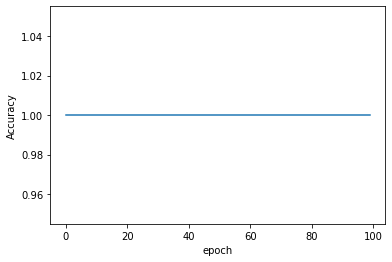

In [ ]:
#Plot Accuracy Graph
plt.plot(accuracy_history)
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
#Print the final accuracy

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy,feed_dict={x: test_X, y_: test_Y})))


In [ ]:
#Print the final mean square error

pred_y = sess.run(y, feed_dict={x: test_X})
mse = tf.reduce_mean(tf.square(pred_y - test_Y))
print("MSE: %.4f" % sess.run(mse))
 

MSE: nan


In [ ]:
#print (accuracy_run)
print('**************************************************************************************')
print("0 Stands for___, 1 stand for___, 2 stand for___, 3 stand for___ classes of protein")
print('**************************************************************************************')
for i in range(754, 768):
	prediction_run = sess.run(prediction, feed_dict={x: X[i].reshape(1,4)})
	accuracy_run = sess.run(accuracy, feed_dict={x: X[i].reshape(1,4), y_:
	print("Original Class : ", y1[i], "Predicted Values : ", prediction_run)

SyntaxError: ignored